# Proyecto 2

### INTRODUCCIÓN AL ANÁLISIS DE DATOS 

#### Por: Carolina Zúñiga Ramírez 





.


Importación de librerías: pandas, numpy, matplotlib y seaborn. 

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df= pd.read_csv('synergy_logistics_database.csv')
df.sample(5)

register_id direction   origin destination  year      date  \
1573          1574   Exports      USA      Brazil  2019  27/03/19   
17330        17331   Imports   France     Germany  2015  09/05/15   
7718          7719   Exports    India      Russia  2017  13/06/17   
3319          3320   Exports    Japan       China  2018  10/06/18   
11677        11678   Exports  Germany         USA  2020  08/02/20   

                         product transport_mode            company_name  \
1573             Aerospace Parts            Sea          Boeing Company   
17330  Machinery and electronics           Road  Daimler Machinery  Inc   
7718                        Rice            Sea         Green India Ltd   
3319                        Cars            Sea                  Suzuki   
11677            Pharmaceuticals            Air                Bayer AG   

       total_value  
1573       8000000  
17330            0  
7718       2000000  
3319       2000000  
11677        17000

**Objetivo:** Elaborar una propuesta que permita enfocar las prioridades de la estrategia operativa para analizar viabilidad de 3 opciones:
        
  1. Rutas de importación y exportación. 
  2. Medio de Transporte utilizado. 
  3.Valor total de importaciones y exportaciones.

### Rutas de importación y exportación 

1. Obtener el total de las exportaciones por cada país, de acuerdo a su origen.
2. Obtener el total de las importaciones por cada país, de acuerdo a su origen.
3. Revisar sus filas y hacer una conjunción de ambos procesos.
4. Obtener los flujos. 

In [47]:
expor= df[df['direction']=='Exports']
expor= expor.groupby('origin')['total_value'].sum()
expor=pd.DataFrame(expor)
expor.reset_index(inplace=True)
expor.sort_values('total_value', ascending=False)
expor.head(2)
#Productos que salen del país 

#China*, Francia*, USA*, South Korea*, Russia, Japan*, Germany*, Canada, Italy, Netherlands 

origin  total_value
0  Australia   1650000000
1    Austria      1155000

In [48]:
impor= df[df['direction']=='Imports']
impor= impor.groupby('origin')['total_value'].sum()
impor=pd.DataFrame(impor)
impor.reset_index(inplace=True)
impor.sort_values('total_value', ascending=False)
impor.head(2)
#Productos que llegan de otro país 

#China*, Japan*, USA*, Mexico, Germany*, Singapore, South Korea*, Malaysia, España, Francia 

origin  total_value
0  Australia    920000000
1     Brazil    489000000

Para el **flujo de importación y exportación**, recurriremos a la investigación de la balanza comercial, puesto que esta mide la diferencia entre las importaciones y exportaciones. 

Este flujo es exportaciones menos importacines ya que está directamente relacionado con el PIB (Producto Interno Bruto) de un país, siendo este calculado como: Consumo privado, más inversióm, más gasto público más exportaciones menos importaciones por lo que cuando las exportaciones son menores a las importaciones hay un **déficit en la balanza comercial**. 

In [77]:
balanza_c=pd.merge(expor,impor,on='origin',how='outer', suffixes=('_expor', '_impor'))
balanza_c = balanza_c.fillna(0)
balanza_c['balanza_comercial']= balanza_c['total_value_expor']- balanza_c['total_value_impor']
order=balanza_c.sort_values('balanza_comercial', ascending=False)
order.head(2)
#Las Rutas Comerciales más importantes de acuerdo a su Flujo son:
        #China, Francia, USA, Russia, South Korea, Canada, Germany, Netherlands, Italy, Japan

origin  total_value_expor  total_value_impor  balanza_comercial
5   China       3.297705e+10       1.223300e+10       2.074405e+10
6  France       1.861433e+10       1.316000e+09       1.729833e+10

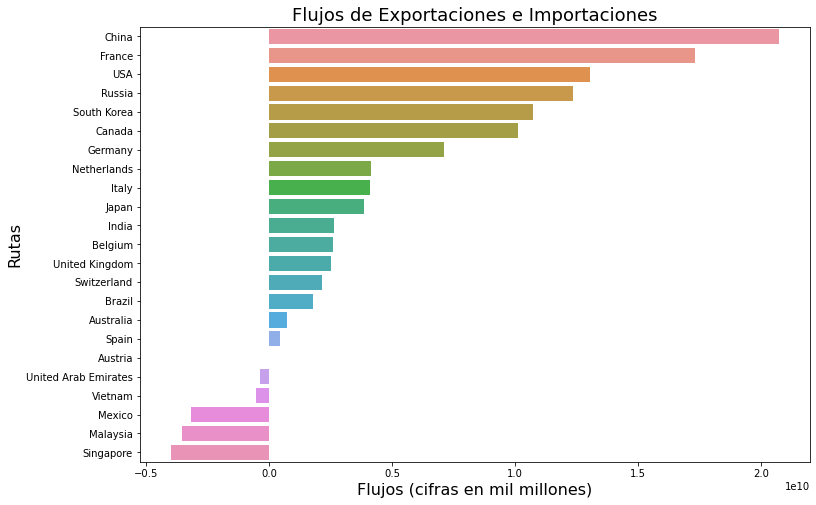

In [274]:
f, bx = plt.subplots(figsize=(12,8))
sns.barplot(x='balanza_comercial', y='origin', data=order, estimator=np.median)
bx.set_ylabel('Rutas', size=16)
bx.set_xlabel('Flujos (cifras en mil millones)', size=16)
bx.set_title('Flujos de Exportaciones e Importaciones',size=18)
plt.show()

### Medio de transporte utilizado

1. Obtener el transporte más y menos usado por Synergy Logistics. 
    1.1 Se hizo por porcentajes 
2. Por las 10 rutas más importantes, ver cual es el más utilizado y el menos usado. 


In [85]:
trans= df.groupby('transport_mode')['origin'].count()
trans

transport_mode
Air      2389
Rail     3381
Road     2598
Sea     10688
Name: origin, dtype: int64

#### **Por Rutas más importantes:**

In [91]:
china= df[df['origin']=='China']
china=china.groupby('transport_mode')['origin'].count()
china

transport_mode
Air     1369
Rail     403
Road     190
Sea      310
Name: origin, dtype: int64

In [93]:
france= df[df['origin']=='France']
france=france.groupby('transport_mode')['origin'].count()
france

transport_mode
Rail    246
Road    434
Sea     408
Name: origin, dtype: int64

In [94]:
usa= df[df['origin']=='USA']
usa=usa.groupby('transport_mode')['origin'].count()
usa

transport_mode
Air      105
Rail     331
Road     126
Sea     1278
Name: origin, dtype: int64

In [98]:
rus= df[df['origin']=='Russia']
rus=rus.groupby('transport_mode')['origin'].count()
rus

transport_mode
Rail    170
Road    259
Sea     379
Name: origin, dtype: int64

In [100]:
s_k= df[df['origin']=='South Korea']
s_k=s_k.groupby('transport_mode')['origin'].count()
s_k

transport_mode
Air      29
Sea    1266
Name: origin, dtype: int64

In [101]:
c= df[df['origin']=='Canada']
c=c.groupby('transport_mode')['origin'].count()
c

transport_mode
Rail    375
Road     47
Sea     228
Name: origin, dtype: int64

In [103]:
g= df[df['origin']=='Germany']
g=g.groupby('transport_mode')['origin'].count()
g

transport_mode
Air     313
Rail    112
Road    299
Sea     940
Name: origin, dtype: int64

In [105]:
n= df[df['origin']=='Netherlands']
n=n.groupby('transport_mode')['origin'].count()
n

transport_mode
Rail    160
Road    559
Sea      77
Name: origin, dtype: int64

In [107]:
i= df[df['origin']=='Italy']
i=i.groupby('transport_mode')['origin'].count()
i

transport_mode
Rail    417
Road     48
Sea     183
Name: origin, dtype: int64

In [148]:
j= df[df['origin']=='Japan']
j=j.groupby('transport_mode')['origin'].count()
j

transport_mode
Air     573
Sea    1129
Name: origin, dtype: int64

In [152]:
b= df[df['origin']=='Mexico']
b=b.groupby('transport_mode')['origin'].count()
b

transport_mode
Rail    199
Road     29
Sea     910
Name: origin, dtype: int64

In [145]:
sea=1129+183+77+940+228+1266+379+1278+408+310
print('sea: ', str(sea))

air=573+313+29+105+1369
print('air: ', str(air))

road=48+559+299+47+259+126+434+190

print('road: ', str(road))

rail= 417+ 160+112+375+170+331+246+403
print('rail: ', str(rail))


sea:  6198
air:  2389
road:  1962
rail:  2214


In [154]:

T_Air= 2389
T_Rail=  3381
T_Road= 2598
T_Sea= 10688

p_sea=sea/T_Sea
print('p_sea = ', str(p_sea))

p_air=air/T_Air
print('p_air = ', str(p_air))

p_road=road/T_Road
print('p_road = ', str(p_road))

p_rail=rail/T_Rail
print('p_rail = ', str(p_rail))



p_sea =  0.5799026946107785
p_air =  1.0
p_road =  0.7551963048498845
p_rail =  0.6548358473824313


In [171]:

T_Air= 2389
T_Rail=  3381
T_Road= 2598
T_Sea= 10688

Total= T_Air+ T_Rail + T_Road + T_Sea
print('air_p: ', str(T_Air/Total))
print('rail_p: ', str(T_Rail/Total))
print('road_p: ', str(T_Road/Total))
print('sea_p: ', str(T_Sea/Total))

a=(T_Air/Total)
r=T_Rail/Total
ro=T_Road/Total
s=T_Sea/Total


porcentajes = [a, r, ro, s]
transporte = ['Aire', 'Tren', 'Carretera', 'Mar']
df_p= pd.DataFrame(porcentajes)
df_p['Transporte']= transporte
df_p.columns=['Participación del Total', 'Modo de Transporte']
df_p

air_p:  0.12536733837111672
rail_p:  0.17742443324937027
road_p:  0.13633501259445843
sea_p:  0.5608732157850546


Participación del Total Modo de Transporte
0                 0.125367               Aire
1                 0.177424               Tren
2                 0.136335          Carretera
3                 0.560873                Mar

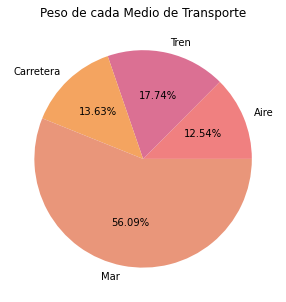

<Figure size 432x288 with 0 Axes>

In [288]:
f, bx = plt.subplots(figsize=(12,5))
transporte = ['Aire', 'Tren', 'Carretera', 'Mar']
porcentajes = [2389, 3381, 2598, 10688]
colores = ['lightcoral','palevioletred','sandybrown','darksalmon']
 
plt.pie(x=porcentajes, labels=transporte, colors = colores, autopct='%1.2f%%')
plt.title('Peso de cada Medio de Transporte')
plt.show()
plt.savefig("Medio_Trans.png")

In [289]:
plt.savefig("Medio_Trans.png", bbox_inches='tight', dpi=300,)

<Figure size 432x288 with 0 Axes>

### Valor total de importaciones y exportaciones

1. Tomando en cuenta la suma de ambos, exportaciones e importaciones 
2. Tomando en cuenta con los flujos 


##  **1.** 

In [249]:
order=balanza_c.sort_values('balanza_comercial', ascending=False)
order.head()

origin  total_value_expor  total_value_impor  balanza_comercial
5         China       3.297705e+10       1.223300e+10       2.074405e+10
6        France       1.861433e+10       1.316000e+09       1.729833e+10
18          USA       1.835531e+10       5.291000e+09       1.306431e+10
13       Russia       1.322300e+10       8.510000e+08       1.237200e+10
15  South Korea       1.462115e+10       3.889000e+09       1.073215e+10

In [215]:
sum_exp_imp= sum(order['total_value_expor'])+ sum(order['total_value_impor'])
sum_exp_imp


215691298000.0

In [221]:
#order['sum']= sum(order['total_value_expor'])+ sum(order['total_value_impor'])
#order

In [246]:
ochenta_p=order.iloc[0:9,:].sum(axis=0)
ochenta_p


origin               ChinaFranceUSARussiaSouth KoreaCanadaGermanyNe...
total_value_expor                                          1.29305e+11
total_value_impor                                           2.9667e+10
balanza_comercial                                          9.96381e+10
sum                                                        1.94122e+12
dtype: object

In [247]:
tot_p=ochenta_p[1] + ochenta_p[2]
tot_p

158972116000.0

In [248]:
ochenta_por_pais=tot_p/sum_exp_imp
ochenta_por_pais

0.7370353717283485

## 2. 

In [251]:
order=balanza_c.sort_values('balanza_comercial', ascending=False)
order.head()

origin  total_value_expor  total_value_impor  balanza_comercial
5         China       3.297705e+10       1.223300e+10       2.074405e+10
6        France       1.861433e+10       1.316000e+09       1.729833e+10
18          USA       1.835531e+10       5.291000e+09       1.306431e+10
13       Russia       1.322300e+10       8.510000e+08       1.237200e+10
15  South Korea       1.462115e+10       3.889000e+09       1.073215e+10

In [253]:
sum_bal= sum(order['balanza_comercial'])
sum_bal

104635298000.0

In [278]:
ochenta_p=order.iloc[0:6,:4].sum(axis=0)
ochenta_p


origin               ChinaFranceUSARussiaSouth KoreaCanada
total_value_expor                              1.08475e+11
total_value_impor                               2.4149e+10
balanza_comercial                              8.43258e+10
dtype: object

In [279]:
tot_p=ochenta_p[3]
tot_p

84325830000.0

In [280]:
ochenta_por_pais=tot_p/sum_bal
ochenta_por_pais

0.8059023256186454

R: China France USA Russia South Korea Canada